In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv('../data/data_jan_listings_3plus.csv',low_memory=False)

In [3]:
listings.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,11551.0,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732000000000001,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$88.00,$645.00,"$2,350.00",$400.00,$30.00,2.0,$25.00,2.0,180.0,17.0,42,72,344,186,3.0,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56
1,13913.0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.568020000000004,-0.11120999999999999,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$333.00,"$1,176.00",$100.00,$15.00,1.0,$15.00,1.0,29.0,30.0,60,90,365,20,6.0,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17
2,15400.0,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$600.00,"$2,250.00",$150.00,$50.00,2.0,$0.00

/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

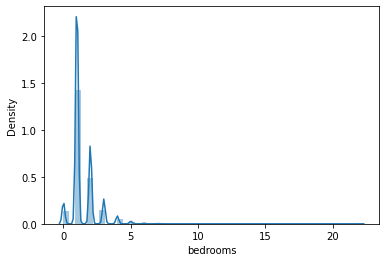

In [3]:
sns.distplot(listings['bedrooms'])

# Price conversion functions

In [4]:
def str_to_price(strn):
    '''The function converts a price entry from string to float and removes the $ character'''
    
    if type(strn)== str:
        return float(strn.strip('$').replace(',',''))
    return strn


def price_tonumerical(df, price_columns):
    '''This function takes as input a dataframe and a list of price column names and converts the columnns to
    floats'''
    
    for column in price_columns:
        df[[column]] = df[[column]].applymap(str_to_price)
    return df

def calculate_cleaning_ratio(df):
    '''This function calculates the ratio of cleaning fee to the nightly price'''
    
    df['cleaning_ratio']=round(df['cleaning_fee']/df['price'],2)
    return df

def calculate_deposit_ratio(df):
    '''This function calculates the ratio of security deposit fee to the nightly price'''
    
    df['deposit_ratio']=round(df['security_deposit']/df['price'],2)
    return df


price_columns=['price', 'security_deposit', 'cleaning_fee', 'extra_people']
price_tonumerical(listings, price_columns)
calculate_cleaning_ratio(listings)


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,cleaning_ratio
0,11551.0,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732000000000001,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",88.0,$645.00,"$2,350.00",400.0,30.0,2.0,25.0,2.0,180.0,17.0,42,72,344,186,3.0,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56,0.34
1,13913.0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.568020000000004,-0.11120999999999999,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,$333.00,"$1,176.00",100.0,15.0,1.0,15.0,1.0,29.0,30.0,60,90,365,20,6.0,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17,0.23
2,15400.0,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,$600.00,"$2,250.00",150.0,50.0,2.0,0.

In [156]:

def categoricals_convert(df, categorical_columns):
    '''This function takes as input a dataframe and a list of categorical (t/f) column names and converts the columnns to
    0/1'''
    for column in categorical_columns:
        listings[[column]]=listings[[column]].applymap(lambda x: 1 if x =='t' else (0 if x == 'f' else x))
    return df
    
categorical_columns=['instant_bookabke', 'host_identity_verified']    
    

In [58]:
def availability(df):
    data=df['availability_365']
    data[data=='f']='NaN'
    out = pd.DataFrame(data.astype(float))
    return out
    #return data.applymap(lambda x: int(x) if type(x) == float else (int(x) if x.isnumeric() else 'NaN'))
                  
availability(listings)

/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,availability_365
0,344.0
1,365.0
2,179.0
3,250.0
4,101.0
...,...
51745,336.0
51746,253.0
51747,235.0
51748,282.0


In [42]:
listings['availability_365'].value_counts()

0      14611
365     1379
364      806
90       614
8        528
89       508
1        389
363      362
179      361
180      346
68       299
7        294
88       288
343      268
3        266
2        263
362      261
9        257
39       237
87       228
358      224
83       210
4        198
359      193
82       193
178      192
6        188
22       186
5        186
356      183
10       179
69       177
81       174
360      170
12       169
314      167
14       166
361      165
357      164
355      158
80       158
351      155
86       153
283      152
353      151
173      151
11       149
350      148
177      147
16       147
84       146
15       145
20       145
352      144
51       144
19       144
17       143
13       142
59       141
66       140
158      140
344      140
37       139
346      137
78       137
342      137
348      137
354      136
76       135
349      134
77       134
18       134
75       134
67       134
41       132
73       132
334      129

In [154]:
def response_rate(df):
    '''This function takes as input a dataframe and a list of price column names and converts the columnns to
    floats'''
    
    
    def str_to_time(strn):
        '''The function converts a price entry from string to float and removes the $ character'''

        if type(strn)== str:
            return float(strn.strip('%'))
        return strn
    
    for column in ['host_response_rate']:
        df[[column]] = df[[column]].applymap(str_to_time)
    return df

response_rate(listings)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,cleaning_ratio
0,11551.0,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100.0,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732000000000001,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",88.0,$645.00,"$2,350.00",400.0,30.0,2.0,25.0,2.0,180.0,17.0,42,72,344,186,3.0,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56,0.34
1,13913.0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70.0,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.568020000000004,-0.11120999999999999,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,$333.00,"$1,176.00",100.0,15.0,1.0,15.0,1.0,29.0,30.0,60,90,365,20,6.0,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17,0.23
2,15400.0,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100.0,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,$600.00,"$2,250.00",150.0,50.0,2.0

In [124]:
listings['host_response_time'].value_counts()

within an hour        27556
within a few hours     7344
within a day           4817
a few days or more      642
Entire home/apt           1
Name: host_response_time, dtype: int64

In [114]:
listings.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,cleaning_ratio
0,11551.0,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732000000000001,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",88.0,$645.00,"$2,350.00",400.0,30.0,2.0,25.0,2.0,180.0,17.0,42,72,344,186,3.0,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56,0.340909
1,13913.0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.568020000000004,-0.11120999999999999,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,$333.00,"$1,176.00",100.0,15.0,1.0,15.0,1.0,29.0,30.0,60,90,365,20,6.0,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17,0.230769
2,15400.0,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,$600.00,"$2,250.00",150.0,50.

In [94]:
listings[['review_scores_rating','review_scores_cleanliness','review_scores_value','price','cleaning_fee','security_deposit','cleaning_ratio','security_ratio']].corr()


,review_scores_rating,review_scores_cleanliness,review_scores_value,price,cleaning_fee,security_deposit,cleaning_ratio,security_ratio
review_scores_rating,1.000000,0.732131,0.777672,-0.022731,-0.054881,0.063406,-0.084889,0.049809
review_scores_cleanliness,0.732131,1.000000,0.621509,0.007261,-0.007596,0.069848,-0.056023,0.042316
review_scores_value,0.777672,0.621509,1.000000,-0.081685,-0.139648,0.004072,-0.090861,0.040398
price,-0.022731,0.007261,-0.081685,1.000000,0.375863,0.192813,-0.116964,-0.058166
cleaning_fee,-0.054881,-0.007596,-0.139648,0.375863,1.000000,0.304638,0.478846,0.002627
security_deposit,0.063406,0.069848,0.004072,0.192813,0.304638,1.000000,0.051962,0.627354
cleaning_ratio,-0.084889,-0.056023,-0.090861,-0.116964,0.478846,0.051962,1.000000,0.144586
security_ratio,0.049809,0.042316,0.040398,-0.058166,0.002627,0.627354,0.144586,1.000000


In [93]:
listings['cleaning_ratio']=listings['cleaning_fee']/listings['price']
listings['security_ratio']=listings['security_deposit']/listings['price']


In [87]:
listings[['review_scores_rating','guests_included']].corr()

,review_scores_rating,guests_included
review_scores_rating,1.000000,-0.065423
guests_included,-0.065423,1.000000


In [92]:
listings[listings['guests_included']<2][['review_scores_rating','guests_included']].corr()

,review_scores_rating,guests_included
review_scores_rating,1.000000,-0.044608
guests_included,-0.044608,1.000000


In [90]:
listings[listings['guests_included']<2].shape

(34539, 66)

In [82]:
listings[listings['guests_included']<2][['review_scores_rating','extra_people']].corr()

,review_scores_rating,extra_people
review_scores_rating,1.00000,0.03925
extra_people,0.03925,1.00000


In [96]:
listings[listings['guests_included']>=2][['review_scores_rating','extra_people']].corr()

,review_scores_rating,extra_people
review_scores_rating,1.000000,0.111518
extra_people,0.111518,1.000000


/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='security_deposit', ylabel='Density'>

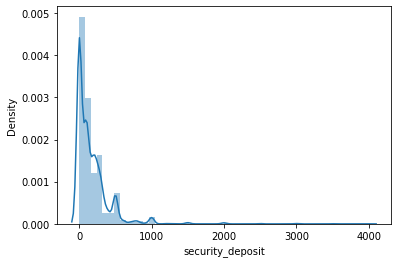

In [61]:
sns.distplot(listings['security_deposit'])

In [157]:
corrs=listings.corr()[['review_scores_rating']]
corrs

,review_scores_rating
id,-0.091068
host_response_rate,0.073612
host_listings_count,-0.094113
host_total_listings_count,-0.094113
accommodates,-0.085664
bathrooms,-0.005567
bedrooms,0.040992
beds,-0.065210
price,-0.022731
security_deposit,0.063406


In [158]:
corrs=corrs.drop(index=['id',"review_scores_rating"])

In [151]:
corrs.to_excel('/Users/lcavicchia/Documents/5_star_project/correlation.xlsx')

# Price Clustering

In [5]:
listings.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,cleaning_ratio
0,11551.0,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732000000000001,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",88.0,$645.00,"$2,350.00",400.0,30.0,2.0,25.0,2.0,180.0,17.0,42,72,344,186,3.0,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56,0.34
1,13913.0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.568020000000004,-0.11120999999999999,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,$333.00,"$1,176.00",100.0,15.0,1.0,15.0,1.0,29.0,30.0,60,90,365,20,6.0,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17,0.23
2,15400.0,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,$600.00,"$2,250.00",150.0,50.0,2.0,0.

/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

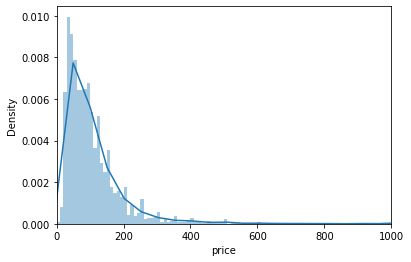

In [9]:
sns.distplot(listings['price'],bins=1000)
plt.xlim(0,1000)

In [17]:
pctl=[]
for p in range(1,10):
    pctl.append(np.nanpercentile(listings['price'], 10*p))

In [18]:
pctl

[31.0, 40.0, 52.0, 69.0, 82.0, 99.0, 120.0, 149.0, 200.0]

In [16]:
listings['price'].value_counts()

100.0      1814
50.0       1663
120.0      1557
40.0       1478
150.0      1377
45.0       1377
80.0       1347
30.0       1338
35.0       1328
60.0       1282
90.0       1250
75.0       1134
70.0       1120
55.0       1056
65.0        999
85.0        968
25.0        942
110.0       933
95.0        810
200.0       787
99.0        747
130.0       724
140.0       633
125.0       614
250.0       531
180.0       489
20.0        469
49.0        466
39.0        457
160.0       446
38.0        389
32.0        375
135.0       372
89.0        367
115.0       367
105.0       366
59.0        360
79.0        352
29.0        347
28.0        347
69.0        346
33.0        328
42.0        324
175.0       311
170.0       278
27.0        277
48.0        265
300.0       265
34.0        257
36.0        256
37.0        243
26.0        240
145.0       238
119.0       215
220.0       211
44.0        204
165.0       202
190.0       199
149.0       192
199.0       191
139.0       187
52.0        187
22.0    

In [26]:
very_cheap = listings[listings['price']<pctl[1]]
cheap = listings[listings['price']>=pctl[1]][listings['price']<pctl[3]]
average = listings[listings['price']>=pctl[3]][listings['price']<pctl[5]]
expensive = listings[listings['price']>=pctl[5]][listings['price']<pctl[7]]
very_expensive =listings[listings['price']>=pctl[7]]

/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lcavicchia/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [41]:
listings['review_scores_rating'].mean()

92.95240395764087

In [36]:
very_cheap.shape, very_cheap['review_scores_rating'].mean()

((8909, 66), 92.94252357431522)

In [37]:
cheap.shape, cheap['review_scores_rating'].mean()

((11787, 66), 93.41783320607449)

In [38]:
average.shape, average['review_scores_rating'].mean()

((9784, 66), 92.89390842191332)

In [39]:
expensive.shape, expensive['review_scores_rating'].mean()

((10732, 66), 92.64787551248602)

In [40]:
very_expensive.shape, very_expensive['review_scores_rating'].mean()

((10537, 66), 92.80459333776217)

In [ ]:
def price_category(data):
    pctl=[]
    for p in range(1,10):
        pctl.append(np.nanpercentile(data['price'], 10*p))
    if data['price'] <pctl[1]:
        data['price_class'] = 'very_cheap'
    elif data['price'] >=pctl[1]: 

In [49]:
very_expensive['review_scores_rating'].mean()

nan

## Neighborhood-based price clustering

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
neighbourhoods = listings['neighbourhood_cleansed'].unique()

In [59]:
columns=['very_cheap', 'cheap', 'average', 'expensive', 'very_expensive']
cluster_df = pd.DataFrame(index=neighbourhoods, columns=columns)
for neigh in neighbourhoods:
    neigh_listings = listings[listings['neighbourhood_cleansed'] == neigh]
    pctl=[]
    for p in range(1,10):
        pctl.append(np.nanpercentile(neigh_listings['price'], 10*p))
    very_cheap = neigh_listings[neigh_listings['price']<pctl[1]]
    cheap = neigh_listings[neigh_listings['price']>=pctl[1]][neigh_listings['price']<pctl[3]]
    average = neigh_listings[neigh_listings['price']>=pctl[3]][neigh_listings['price']<pctl[5]]
    expensive = neigh_listings[neigh_listings['price']>=pctl[5]][neigh_listings['price']<pctl[7]]
    very_expensive =neigh_listings[neigh_listings['price']>=pctl[7]]
    cluster_df.loc[neigh, 'very_cheap']=very_cheap['review_scores_rating'].mean()
    cluster_df.loc[neigh, 'cheap']=cheap['review_scores_rating'].mean()
    cluster_df.loc[neigh, 'average']=average['review_scores_rating'].mean()
    cluster_df.loc[neigh, 'expensive']=expensive['review_scores_rating'].mean()
    cluster_df.loc[neigh, 'very_expensive']=very_expensive['review_scores_rating'].mean()
    #print(f"Neighborhood: {neigh} - Very cheap: {very_cheap['review_scores_rating'].mean()} - \
    #    cheap: {cheap['review_scores_rating'].mean()} - \
    #    average: {average['review_scores_rating'].mean()} - \
    #    expensive: {expensive['review_scores_rating'].mean()} - \
    #    very expensive: {very_expensive['review_scores_rating'].mean()} - \
    #      ")

In [60]:
cluster_df

,very_cheap,cheap,average,expensive,very_expensive
Lambeth,94.812,93.8739,94.1609,94.6672,93.5273
Islington,93.3903,93.8398,93.4806,92.9986,93.6895
Kensington and Chelsea,91.5989,90.6968,90.709,91.8571,92.749
Westminster,90.3339,90.2897,90.9503,91.3415,91.702
Wandsworth,93.8354,95.4789,94.2505,94.3733,95.1984
Barnet,95.7227,95.2796,94.8133,92.1818,93.1084
Hounslow,93.8475,94.5,94.7083,93.3333,94.7479
Camden,91.2669,91.5051,91.5982,92.2104,92.083
Richmond upon Thames,95.3701,96.625,95.3418,94.5827,95.7692
Haringey,93.1598,95.2863,94.9848,94.3755,95.0392


In [61]:
cluster_df.mean()

very_cheap        93.428528
cheap             94.217904
average           93.981687
expensive         93.374554
very_expensive    93.635960
dtype: float64

# Bedrooms / room type /location

In [68]:
df=listings.copy()
bedroom_convert = {0.0: 'zero',
                  1.0: 'one',
                  2.0: 'two',
                  3.0: 'threeplus', 4.0: 'threeplus',5.0: 'threeplus',6.0: 'threeplus',7.0: 'threeplus',
                   8.0: 'threeplus',9.0: 'threeplus',10.0: 'threeplus',11.0: 'threeplus',
                   16.0: 'threeplus',22.0: 'threeplus'}
df['bedrooms_cat'] =  df['bedrooms'].map(bedroom_convert)
df['room/apartment']=df[['room_type']].applymap(lambda x: 'apartment' if x == 'Entire home/apt' else ('room' if x == 'Private room' else 'Other'))

#df[df['room_type'].isin(['Entire home/apt','Private room'])]

In [70]:
df[['room/apartment']].value_counts()

room/apartment
apartment         30219
room              20686
Other               845
dtype: int64

In [121]:
clusters.groupby(['price-boroughwise', 'room/apt', 'property_size','location']).agg({'review_scores_rating':['count','mean']})


review_scores_rating  \
                                                                             count   
price-boroughwise room/apt property_size location                                    
average           Other    one           Barking and Dagenham                    1   
                                         Bexley                                  2   
                                         Brent                                   1   
                                         Bromley                                 1   
                                         Camden                                  6   
...                                                                            ...   
very_expensive    room     two           Westminster                             6   
                           zero          Enfield                                 2   
                                         Hillingdon                              1   
                                         Tower Hamlets                           1   
                                         Waltham Forest                          1   

                                                                      
                                                                mean  
price-boroughwise room/apt property_size location                     
average           Other    one           Barking and Dagenham   96.0  
                                         Bexley                 99.0  
                                         Brent                  93.0  
                                         Bromley                89.0  
                                         Camden                 85.0  
...                                                              ...  
very_expensive    room     two           Westminster            94.5  
                           zero          Enfield                96.5  
                                         Hillingdon            100.0  
                                         Tower Hamlets          86.0  
                                         Waltham Forest        100.0  

[1144 rows x 2 columns]

# Clustering functions

In [185]:
def price_cat(x,pctl):
    if x <pctl[1]:
        return 'very_cheap'
    elif x >=pctl[1] and x <pctl[3]:
        return 'cheap'
    elif x >=pctl[3] and x <pctl[5]:
        return 'average'
    elif x >=pctl[5] and x <pctl[7]:
        return 'expensive'
    return 'very_expensive'

def clustering(data):
    pctl=[]
    columns=['price-citywise', 'price-boroughwise', 'room/apt', 'property_size']
    cluster_df = pd.DataFrame(columns=columns)
    for p in range(1,10):
        pctl.append(np.nanpercentile(data['price'], 10*p))
    
    cluster_df['price-citywise']=data['price'].apply(lambda x:price_cat(x,pctl))
    
    neighbourhoods = listings['neighbourhood_cleansed'].unique()
    for neigh in neighbourhoods:
        neigh_listings = listings[listings['neighbourhood_cleansed'] == neigh]
        indices= neigh_listings.index.values.tolist()
        pctl=[]
        for p in range(1,10):
            pctl.append(np.nanpercentile(neigh_listings['price'], 10*p))
        #neigh_listings['price'].apply(lambda x:price_cat(x,pctl))
        for index in indices:
            cluster_df.loc[index,'price-boroughwise']=price_cat(neigh_listings.loc[index,'price'],pctl)
            
    
    bedroom_convert = {0.0: 'zero',
                  1.0: 'one',
                  2.0: 'two',
                  3.0: 'threeplus', 4.0: 'threeplus',5.0: 'threeplus',6.0: 'threeplus',7.0: 'threeplus',
                   8.0: 'threeplus',9.0: 'threeplus',10.0: 'threeplus',11.0: 'threeplus',
                   16.0: 'threeplus',22.0: 'threeplus'}
    cluster_df['property_size'] =  data['bedrooms'].map(bedroom_convert)
    cluster_df['room/apt']=data[['room_type']].applymap(lambda x: 'apartment' if x == 'Entire home/apt' else 'room')# if x == 'Private room' else 'Other'))
    
    cluster_df['location']=data['neighbourhood_cleansed']
    
    cluster_df['review_scores_rating']=data['review_scores_rating']
    
    cluster_df['property_size'] = cluster_df.apply(lambda x: 'one' if x['room/apt']== 'room' else x['property_size'], axis=1)
    
    return cluster_df

clusters=clustering(listings)


In [186]:
clusters.head(50)


,price-citywise,price-boroughwise,room/apt,property_size,location,review_scores_rating
0,average,expensive,apartment,one,Lambeth,92.0
1,cheap,cheap,room,one,Islington,97.0
2,expensive,cheap,apartment,one,Kensington and Chelsea,96.0
3,very_expensive,very_expensive,apartment,threeplus,Westminster,94.0
4,cheap,cheap,apartment,two,Wandsworth,93.0
5,very_cheap,very_cheap,room,one,Barnet,95.0
6,expensive,expensive,room,one,Hounslow,88.0
7,cheap,very_cheap,room,one,Camden,93.0
8,very_expensive,very_expensive,apartment,threeplus,Richmond upon Thames,97.0
9,average,average,room,one,Haringey,97.0


In [177]:
group_clust_4=cluster_df.groupby(['price-boroughwise', 'room/apt', 'property_size','location']).agg({'review_scores_rating':['count','mean']})


In [178]:
group_clust_4.reset_index()

price-boroughwise   room/apt property_size                location  \
                                                                         
0             average  apartment           one    Barking and Dagenham   
1             average  apartment           one                  Barnet   
2             average  apartment           one                   Brent   
3             average  apartment           one                 Bromley   
4             average  apartment           one                  Camden   
5             average  apartment           one          City of London   
6             average  apartment           one                 Croydon   
7             average  apartment           one                  Ealing   
8             average  apartment           one                 Enfield   
9             average  apartment           one               Greenwich   
10            average  apartment           one                 Hackney   
11            average  apartment           one  Hammersmith and Fulham   
12            average  apartment           one                Haringey   
13            average  apartment           one                  Harrow   
14            average  apartment           one                Havering   
15            average  apartment           one              Hillingdon   
16            average  apartment           one                Hounslow   
17            average  apartment           one               Islington   
18            average  apartment           one  Kensington and Chelsea   
19            average  apartment           one    Kingston upon Thames   
20            average  apartment           one                 Lambeth   
21            average  apartment           one                Lewisham   
22            average  apartment           one                  Merton   
23            average  apartment           one                  Newham   
24            average  apartment           one               Redbridge   
25            average  apartment           one    Richmond upon Thames   
26            average  apartment           one               Southwark   
27            average  apartment           one                  Sutton   
28            average  apartment           one           Tower Hamlets   
29            average  apartment           one          Waltham Forest   
30            average  apartment           one              Wandsworth   
31            average  apartment           one             Westminster   
32            average  apartment     threeplus                  Barnet   
33            average  apartment     threeplus                  Camden   
34            average  apartment     threeplus                 Enfield   
35            average  apartment     threeplus               Greenwich   
36            average  apartment     threeplus                 Hackney   
37            average  apartment     threeplus  Hammersmith and Fulham   
38            average  apartment     threeplus                Haringey   
39            average  apartment     threeplus                  Harrow   
40            average  apartment     threeplus               Islington   
41            average  apartment     threeplus  Kensington and Chelsea   
42            average  apartment     threeplus    Kingston upon Thames   
43            average  apartment     threeplus                 Lambeth   
44            average  apartment     threeplus                  Newham   
45            average  apartment     threeplus    Richmond upon Thames   
46            average  apartment     threeplus               Southwark   
47            average  apartment     threeplus           Tower Hamlets   
48            average  apartment     threeplus              Wandsworth   
49            average  apartment     threeplus             Westminster   
50            average  apartment           two                  Barnet   
51            average  apartment           two                   Brent   
52      

In [181]:
group_clust_2=cluster_df.groupby(['price-boroughwise','location']).agg({'review_scores_rating':['count','mean']})


In [184]:
group_clust_2.reset_index()

price-boroughwise                location review_scores_rating           
                                                             count       mean
0             average    Barking and Dagenham                   37  93.675676
1             average                  Barnet                  166  94.813253
2             average                  Bexley                   18  96.222222
3             average                   Brent                  317  90.974763
4             average                 Bromley                   71  94.774648
5             average                  Camden                  774  91.598191
6             average          City of London                   44  90.863636
7             average                 Croydon                  115  95.165217
8             average                  Ealing                  177  94.073446
9             average                 Enfield                   79  94.936709
10            average               Greenwich                  195  94.246154
11            average                 Hackney                  747  94.969210
12            average  Hammersmith and Fulham                  437  92.512586
13            average                Haringey                  264  94.984848
14            average                  Harrow                   55  95.290909
15            average                Havering                   20  96.300000
16            average              Hillingdon                   60  93.316667
17            average                Hounslow                  144  94.708333
18            average               Islington                  566  93.480565
19            average  Kensington and Chelsea                  622  90.709003
20            average    Kingston upon Thames                   63  96.698413
21            average                 Lambeth                  603  94.160862
22            average                Lewisham                  286  94.548951
23            average                  Merton                  134  95.425373
24            average                  Newham                  212  94.462264
25            average               Redbridge                   76  92.592105
26            average    Richmond upon Thames                  158  95.341772
27            average               Southwark                  668  93.164671
28            average                  Sutton                   33  96.333333
29            average           Tower Hamlets                 1053  91.956315
30            average          Waltham Forest                  133  93.894737
31            average              Wandsworth                  479  94.250522
32            average             Westminster                 1147  90.950305
33              cheap    Barking and Dagenham                   31  91.419355
34              cheap                  Barnet                  211  95.279621
35              cheap                  Bexley                   19  96.315789
36              cheap                   Brent                  321  93.037383
37              cheap                 Bromley                   74  95.837838
38              cheap                  Camden                  879  91.505119
39              cheap          City of London                   53  93.018868
40              cheap                 Croydon                  138  95.166667
41              cheap                  Ealing                  208  94.850962
42              cheap                 Enfield                   57  94.771930
43              cheap               Greenwich                  176  94.511364
44              cheap                 Hackney                  741  95.113360
45              cheap  Hammersmith and Fulham                  515  92.565049
46              cheap                Haringey                  248  95.286290
47              cheap                  Harrow                   45  95.733333
48              cheap                Havering                   29  95.586207
49              cheap     

# Cluster ranking

In [ ]:
def ranking(location, price, size, ptype, data, clusters):
    neigh_listings = listings[listings['neighbourhood_cleansed'] == location]
        indices= neigh_listings.index.values.tolist()
        pctl=[]
        for p in range(1,10):
            pctl.append(np.nanpercentile(neigh_listings['price'], 10*p))
    price_cat=price_cat(price,pctl)
    
    if ptype != 'Entire home/apt':
        ptype_cat = 'room'
    else:
        ptype_cat = 'apartment'
    

    
    return clusters[(clusters['neighbourhood_cleansed'] == location ) &  (clusters['price-boroughwise'] == price_cat ) &\
            (clusters['room/apt'] == ptype ) &  (clusters['property_size'] == size )\
            ]['review_scores_rating'].rank(method='max')
#df['review_rank'] = df['review_scores_rating'].rank(method='max')

rank= ranking('Hackney')

In [203]:
def simple_ranking(location, price, size, ptype, clusters):
    
    
    cluster = clusters[(clusters['location'] == location ) &  (clusters['price-boroughwise'] == price ) &\
            (clusters['room/apt'] == ptype ) &  (clusters['property_size'] == size )\
            ]
    cluster['ranking'] = cluster['review_scores_rating'].rank(method='min',ascending=False)
    cluster_average = cluster['review_scores_rating'].mean()
    return cluster, cluster_average

ranked_cluster, mean_rating=simple_ranking('Hackney', 'expensive', 'one', 'apartment', clusters)



In [202]:
ranked_cluster.sort_values(by='ranking')

,price-citywise,price-boroughwise,room/apt,property_size,location,review_scores_rating,ranking
51666,expensive,expensive,apartment,one,Hackney,100.0,1.0
11279,average,expensive,apartment,one,Hackney,100.0,1.0
16218,average,expensive,apartment,one,Hackney,100.0,1.0
16135,average,expensive,apartment,one,Hackney,100.0,1.0
42554,expensive,expensive,apartment,one,Hackney,100.0,1.0
5793,expensive,expensive,apartment,one,Hackney,100.0,1.0
5817,expensive,expensive,apartment,one,Hackney,100.0,1.0
15933,expensive,expensive,apartment,one,Hackney,100.0,1.0
6133,expensive,expensive,apartment,one,Hackney,100.0,1.0
31114,average,expensive,apartment,one,Hackney,100.0,1.0


In [204]:
mean_rating

95.03252032520325

In [161]:
low_entries=group_clust[group_clust['review_scores_rating']['count']<10]

In [163]:
low_entries=low_entries.reset_index()


In [164]:
low_entries

price-boroughwise   room/apt   property_size                location  \
                                                                          
0            average  apartment         average                  Merton   
1            average  apartment         average                  Newham   
2            average  apartment           cheap                  Harrow   
3            average  apartment           cheap                Havering   
4            average  apartment           cheap              Hillingdon   
5            average  apartment           cheap               Redbridge   
6            average  apartment           cheap                  Sutton   
7            average  apartment           cheap              Wandsworth   
8            average  apartment      very_cheap    Barking and Dagenham   
9            average  apartment      very_cheap                 Bromley   
10           average  apartment      very_cheap                 Croydon   
11           average  apartment      very_cheap                  Harrow   
12           average  apartment      very_cheap                Havering   
13           average  apartment      very_cheap              Hillingdon   
14           average  apartment      very_cheap               Redbridge   
15           average  apartment      very_cheap                  Sutton   
16           average  apartment  very_expensive          City of London   
17           average       room             one          City of London   
18             cheap  apartment           cheap                  Barnet   
19             cheap  apartment           cheap                   Brent   
20             cheap  apartment           cheap                  Ealing   
21             cheap  apartment           cheap                Hounslow   
22             cheap  apartment           cheap    Kingston upon Thames   
23             cheap  apartment           cheap                  Newham   
24             cheap  apartment           cheap          Waltham Forest   
25             cheap  apartment      very_cheap    Barking and Dagenham   
26             cheap  apartment      very_cheap                  Barnet   
27             cheap  apartment      very_cheap                  Bexley   
28             cheap  apartment      very_cheap                   Brent   
29             cheap  apartment      very_cheap                 Bromley   
30             cheap  apartment      very_cheap                 Croydon   
31             cheap  apartment      very_cheap                  Ealing   
32             cheap  apartment      very_cheap                 Enfield   
33             cheap  apartment      very_cheap               Greenwich   
34             cheap  apartment      very_cheap                Haringey   
35             cheap  apartment      very_cheap              Hillingdon   
36             cheap  apartment      very_cheap                Hounslow   
37             cheap  apartment      very_cheap                  Merton   
38             cheap  apartment      very_cheap                  Newham   
39             cheap  apartment      very_cheap           Tower Hamlets   
40             cheap  apartment      very_cheap          Waltham Forest   
41             cheap       room             one          City of London   
42         expensive  apartment         average                Havering   
43         expensive  apartment         average               Redbridge   
44         expensive  apartment           cheap                  Bexley   
45         expensive  apartment       expensive                  Ealing   
46         expensive  apartment  very_expensive  Hammersmith and Fulham   
47         expensive       room             one    Barking and Dagenham   
48        very_cheap  apartment           cheap          City of London   
49        very_cheap  apartment           cheap                 Hackney   
50        very_cheap  apartment           cheap  Hammersmith and Fulham   
51        very_cheap  apartm

(0.0, 100.0)

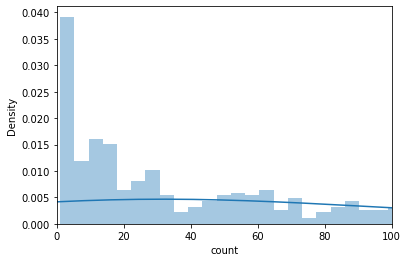

In [155]:
sns.distplot(group_clust['review_scores_rating']['count'],bins=300)
plt.xlim(0,100)

In [137]:
listings['room_type'].value_counts()

Entire home/apt    30219
Private room       20686
Hotel room           553
Shared room          290
2                      1
Name: room_type, dtype: int64

In [158]:
group_clust=cluster_df.groupby(['price-boroughwise','location']).agg({'review_scores_rating':['count','mean']})
group_clust=group_clust.reset_index()
group_clust

price-boroughwise                location review_scores_rating           
                                                             count       mean
0             average    Barking and Dagenham                   37  93.675676
1             average                  Barnet                  166  94.813253
2             average                  Bexley                   18  96.222222
3             average                   Brent                  317  90.974763
4             average                 Bromley                   71  94.774648
5             average                  Camden                  774  91.598191
6             average          City of London                   44  90.863636
7             average                 Croydon                  115  95.165217
8             average                  Ealing                  177  94.073446
9             average                 Enfield                   79  94.936709
10            average               Greenwich                  195  94.246154
11            average                 Hackney                  747  94.969210
12            average  Hammersmith and Fulham                  437  92.512586
13            average                Haringey                  264  94.984848
14            average                  Harrow                   55  95.290909
15            average                Havering                   20  96.300000
16            average              Hillingdon                   60  93.316667
17            average                Hounslow                  144  94.708333
18            average               Islington                  566  93.480565
19            average  Kensington and Chelsea                  622  90.709003
20            average    Kingston upon Thames                   63  96.698413
21            average                 Lambeth                  603  94.160862
22            average                Lewisham                  286  94.548951
23            average                  Merton                  134  95.425373
24            average                  Newham                  212  94.462264
25            average               Redbridge                   76  92.592105
26            average    Richmond upon Thames                  158  95.341772
27            average               Southwark                  668  93.164671
28            average                  Sutton                   33  96.333333
29            average           Tower Hamlets                 1053  91.956315
30            average          Waltham Forest                  133  93.894737
31            average              Wandsworth                  479  94.250522
32            average             Westminster                 1147  90.950305
33              cheap    Barking and Dagenham                   31  91.419355
34              cheap                  Barnet                  211  95.279621
35              cheap                  Bexley                   19  96.315789
36              cheap                   Brent                  321  93.037383
37              cheap                 Bromley                   74  95.837838
38              cheap                  Camden                  879  91.505119
39              cheap          City of London                   53  93.018868
40              cheap                 Croydon                  138  95.166667
41              cheap                  Ealing                  208  94.850962
42              cheap                 Enfield                   57  94.771930
43              cheap               Greenwich                  176  94.511364
44              cheap                 Hackney                  741  95.113360
45              cheap  Hammersmith and Fulham                  515  92.565049
46              cheap                Haringey                  248  95.286290
47              cheap                  Harrow                   45  95.733333
48              cheap                Havering                   29  95.586207
49              cheap     